<a href="https://colab.research.google.com/github/wahyudims/Subfloor-Structure-Optimization/blob/main/SubfloorOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from google.colab import files

# Reading the dataset
The dataset used is the dataset of various configuration of subfloor of commercial aircraft. The configuration parameters consist of Cross-section size, fibre orientation of composite, mass, and cross-section itself.

In [4]:
df=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/StudiKasus/DataBaru.xlsx')
df=df.drop(df.iloc[:,0:1], axis=1)
print(df.head())
print(df.info())

   Ukuran_Cross_Section  Orientasi  ...  Force/mass         SEA
0                    80         60  ...  173.264732  364.187705
1                    88         59  ...  195.800441  380.579159
2                    70         59  ...   93.012718  297.550636
3                    72         59  ...  196.674517  602.044277
4                    52         58  ...  167.928158  561.629402

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ukuran_Cross_Section  150 non-null    int64  
 1   Orientasi             150 non-null    int64  
 2   Cross_Section         150 non-null    object 
 3   Mass                  150 non-null    float64
 4   Force                 150 non-null    float64
 5   EA                    150 non-null    float64
 6   Force/mass            150 non-null    float64
 7   SEA                   150 

# Split the dataset into X and y variable 
from those configuration, there are several output produced which are the strength of subfloor structure (Force), Energy Absorption (EA), Strength per mass ratio (Force/mass), and Specific Energy Absorption (SEA). In this example we will focus on the output of Force/mass, so we will put the configuration parameters (Cross-section size, fibre orientation of composite, mass, and cross-section itself) into variable X and Force/mass into variable y

In [5]:
X=df.iloc[:,0:4]
y=df.iloc[:,6:7]
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing Data
The 'Cross_Section' column consist of three value which are ['Tophat', 'I-beam', 'C-beam']. These values are categorical value and need to be converted into numerical value so it can be processed by the algorithm. To convert it from categorical into numerical value, we need to do One Hot Encoding process which transforms the value into binary value (0 and 1)

In [7]:
ct = ColumnTransformer([("Cross_Section", OneHotEncoder(), [2])], remainder = 'passthrough') # 2 is choosen because cross section has column index of 2
X = np.array(ct.fit_transform(X), dtype=np.float64)
print(X)

[[ 0.        0.        1.       80.       60.        0.925347]
 [ 0.        0.        1.       88.       59.        1.06154 ]
 [ 0.        0.        1.       70.       59.        1.0615  ]
 [ 0.        0.        1.       72.       59.        1.0615  ]
 [ 0.        0.        1.       52.       58.        1.03449 ]
 [ 0.        0.        1.       72.       58.        0.886844]
 [ 0.        0.        1.       82.       57.        1.17211 ]
 [ 0.        0.        1.       54.       57.        1.02553 ]
 [ 0.        0.        1.       50.       57.        1.1721  ]
 [ 0.        0.        1.       40.       56.        0.575783]
 [ 0.        0.        1.       48.       56.        1.00751 ]
 [ 0.        0.        1.       58.       55.        1.131   ]
 [ 0.        0.        1.       74.       55.        0.848269]
 [ 0.        0.        1.       64.       55.        0.848269]
 [ 0.        0.        1.       56.       54.        0.693964]
 [ 0.        0.        1.       86.       54.        1.

As we can see that the 'Cross_Section' column transforms into the first three columns which consists of 1 and 0 value. [0 0 1] means it has Tophat cross-section, [0 1 0] means it has I-beam cross-section, and [0 0 1] means it has C-beam cross-section. After that we need to split the data into training data and test data. For building a machine learning model, we need to train our model on the training set. And for checking the performance of our model, we use a Test set. There are 4 variables which are X_train, X_test, y_train, y_test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 0.2 means 20% of the data will be used as test data

Scale the input data to make sure all feature has the same range of value so no feature could heavily dominates

In [9]:
sc = MinMaxScaler() # Scaler that is used in this case is MinMaxScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

# Processing data: making Artificial Neural Network model

Build Artificial Neural Network

In [10]:
regressor = Sequential()#Sequential class needed to build ANN as sequence of layers

#Add input layer and first hidden layer to ANN Architecture
regressor.add(Dense(6, activation = 'linear', input_dim = 6))

#Add another layers in ANN Architecture
regressor.add(Dense(6, activation = 'linear'))
regressor.add(Dense(6, activation = 'linear'))
regressor.add(Dense(6, activation = 'linear'))

#Add output layer in ANN Arcitecture
regressor.add(Dense(1, activation = 'linear'))
#Compiling ANN Using Sthocastic Gradient Descent

#Compile the model
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics = ['mse'] )



#3. Fitting ANN to the Optimization Regression Model
#Fitting to training set
history = regressor.fit(X_train, y_train, batch_size = 10, epochs = 300, validation_data=(X_test,y_test))
y_predict = regressor.predict(X_test)
print(history.history.keys())

Epoch 1/300
12/12 [==============================] - 1s 16ms/step - loss: 0.2695 - mse: 0.2695 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1003 - mse: 0.1003 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 8/300
12/12 [==============================] - 0s 3ms/step - loss: 0.0147 - 

Plotting the train and test data

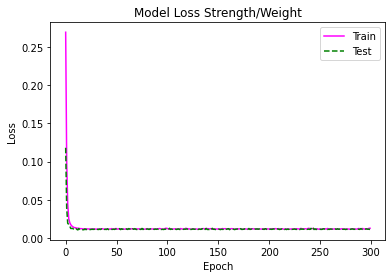

In [11]:
#Visualization Data
#Plot training & validation accuracy
plt.plot(history.history['loss'], 'magenta')
plt.plot(history.history['val_loss'], 'g--')
plt.title('Model Loss Strength/Weight')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

As we can see from the plot of train data and test data, the train and test plot seem close to each other. As we can see after 300 iterations the loss value is 0.0120 and val_loss is 0.0113 which are quite small. It means the results is quite accurate. Next we will extract weight and bias from ANN Model

In [12]:
#Model Evaluation
model = regressor.get_weights()
DFmodel = pd.DataFrame(model)

#Regression Model from ANN
n = len(model)
bias = []
weight = []
for i in range (0,n):
        if i%2 == 1:
            bias.append(model[i])
        else:
            weight.append(model[i])
# print(bias)
# print(weight)
#Regression Bias
a = []
for i in range (0,len(bias)):
    if i < (len(bias)-1):
        w = np.identity(y.shape[1])
        for j in range (0, (len(bias) - i-1)):
            r = np.array(weight[len(bias)-j-1])
            w = np.matmul(w,np.transpose(r))
        bn = np.matmul(w,bias[i])
        a.append(bn)
    else:
        bn = bias[i]
        a.append(bn)

a_reg = sum(a)

#Regression Weight
b_reg = np.identity(y.shape[1])
for j in range (0, (len(bias))):
    r = np.array(weight[len(bias)-j-1])
    b_reg = np.matmul(b_reg,np.transpose(r))

FPW = [a_reg, b_reg]
print(FPW)

[array([-0.32050398]), array([[ 0.29183182,  0.81402033,  0.63242631,  0.23803562, -0.11705439,
         0.37862717]])]


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


As we can see there are 2 arrays. The first array represents bias value which are -0.32050398. The second value represents weight value for each configuration parameters which are in order C-beam, I-beam, Tophat, Cross-section size, Fibre orientation of composite, and mass. The weight value represents the effect of its parameters into the output in this case is the Force/mass value. The bigger the weight value means the configuration parameter will affect the output more compared to other parameters. From the weight values we can conclude that the paramater that has the most impact to the output are I-beam > Tophat > mass > C-beam > Cross-section size > and Fibre orientation of composite. From this conclusion we know which parameter need to be focused more in contributing to the output. This finding can be used as base knowledge to optimize subfloor structure of an aircraft. 